# Exploratory Data Analysis
tables: users, flights, hotels and sessions after filtering (04.01.2023< today and more than 7 sessions)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Users

In [3]:
df = pd.read_csv('../../TravelTide/data/users.csv')

In [4]:
df.head()

,user_id,birthdate,gender,married,has_children,home_country,home_city,home_airport,home_airport_lat,home_airport_lon,sign_up_date
0,531931,1984-05-26,F,False,False,usa,san jose,SJC,37.362,-121.929,2023-01-15
1,611065,1981-08-20,F,False,False,usa,los angeles,LAX,33.942,-118.408,2023-02-22
2,229330,1976-11-08,F,True,False,usa,colorado springs,COS,38.806,-104.700,2022-06-27
3,586762,1987-09-26,F,False,False,canada,montreal,YUL,45.468,-73.741,2023-02-11
4,536035,1995-11-09,M,False,False,usa,new york,LGA,40.777,-73.872,2023-01-17


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           5782 non-null   int64  
 1   birthdate         5782 non-null   object 
 2   gender            5782 non-null   object 
 3   married           5782 non-null   bool   
 4   has_children      5782 non-null   bool   
 5   home_country      5782 non-null   object 
 6   home_city         5782 non-null   object 
 7   home_airport      5782 non-null   object 
 8   home_airport_lat  5782 non-null   float64
 9   home_airport_lon  5782 non-null   float64
 10  sign_up_date      5782 non-null   object 
dtypes: bool(2), float64(2), int64(1), object(6)
memory usage: 418.0+ KB


In [6]:
df.describe()

,user_id,home_airport_lat,home_airport_lon
count,5782.000000,5782.000000,5782.000000
mean,547670.236077,38.449324,-94.158017
std,64035.394540,6.199542,18.070420
min,94883.000000,21.316000,-157.927000
25%,519413.750000,33.818000,-112.289250
50%,542279.500000,39.175000,-90.035000
75%,576215.500000,42.276000,-79.370000
max,844489.000000,61.251000,-63.499000


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df['birthdate'] = pd.to_datetime(df['birthdate'])

In [9]:
# Examples of datetimes functions year, month, day, day_name(), quarter, dayofyear, dayofweek, day_name()

df['birthdate'].dt.month

0        5
1        8
2       11
3        9
4       11
        ..
5777     6
5778    12
5779     7
5780     7
5781     9
Name: birthdate, Length: 5782, dtype: int32

In [10]:
today = pd.Timestamp.today()

In [11]:
df['age'] = (today-df['birthdate']).dt.days//365
df['birthday_dayofyear'] = df['birthdate'].dt.dayofyear

In [12]:
df.head()

,user_id,birthdate,gender,married,has_children,home_country,home_city,home_airport,home_airport_lat,home_airport_lon,sign_up_date,age,birthday_dayofyear
0,531931,1984-05-26,F,False,False,usa,san jose,SJC,37.362,-121.929,2023-01-15,40,147
1,611065,1981-08-20,F,False,False,usa,los angeles,LAX,33.942,-118.408,2023-02-22,43,232
2,229330,1976-11-08,F,True,False,usa,colorado springs,COS,38.806,-104.700,2022-06-27,48,313
3,586762,1987-09-26,F,False,False,canada,montreal,YUL,45.468,-73.741,2023-02-11,37,269
4,536035,1995-11-09,M,False,False,usa,new york,LGA,40.777,-73.872,2023-01-17,29,313


In [13]:
df['tenure_months'] = ((today-pd.to_datetime(df['sign_up_date'])).dt.days//30.41).astype('int64')

In [14]:
df.head()

,user_id,birthdate,gender,married,has_children,home_country,home_city,home_airport,home_airport_lat,home_airport_lon,sign_up_date,age,birthday_dayofyear,tenure_months
0,531931,1984-05-26,F,False,False,usa,san jose,SJC,37.362,-121.929,2023-01-15,40,147,26
1,611065,1981-08-20,F,False,False,usa,los angeles,LAX,33.942,-118.408,2023-02-22,43,232,25
2,229330,1976-11-08,F,True,False,usa,colorado springs,COS,38.806,-104.700,2022-06-27,48,313,33
3,586762,1987-09-26,F,False,False,canada,montreal,YUL,45.468,-73.741,2023-02-11,37,269,25
4,536035,1995-11-09,M,False,False,usa,new york,LGA,40.777,-73.872,2023-01-17,29,313,26


## Plots

In [15]:
cat_col = ['gender', 'home_country', 'home_city', 'home_airport']

In [16]:
num_col = [col for col in df.columns if col not in cat_col + [ 'birthdate', 'sign_up_date']]

### Categorical Columns

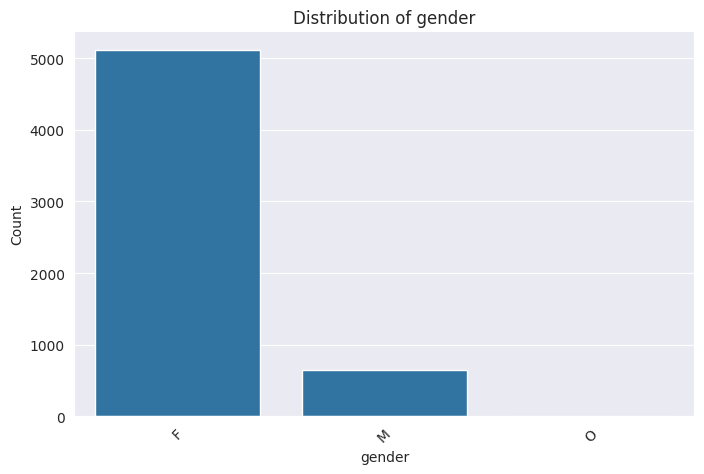

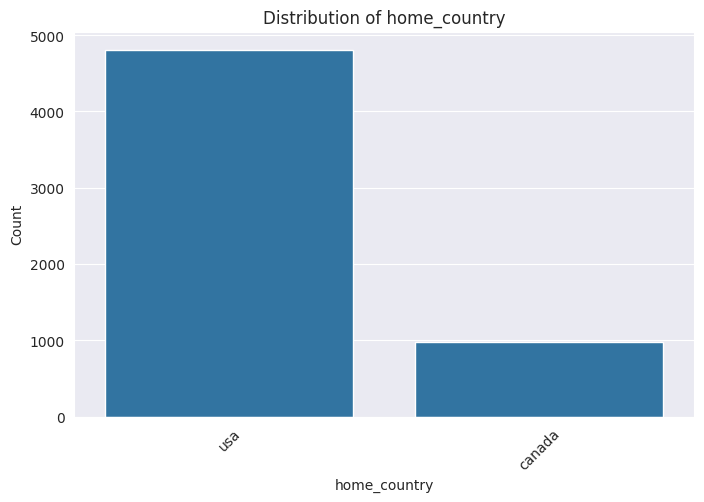

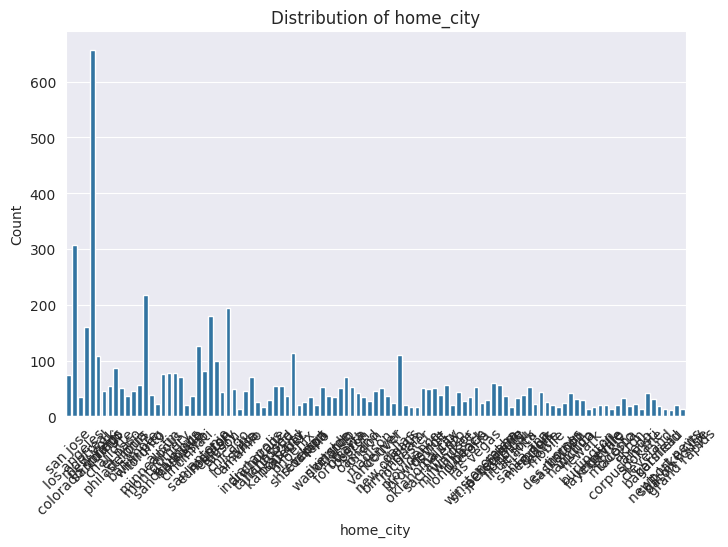

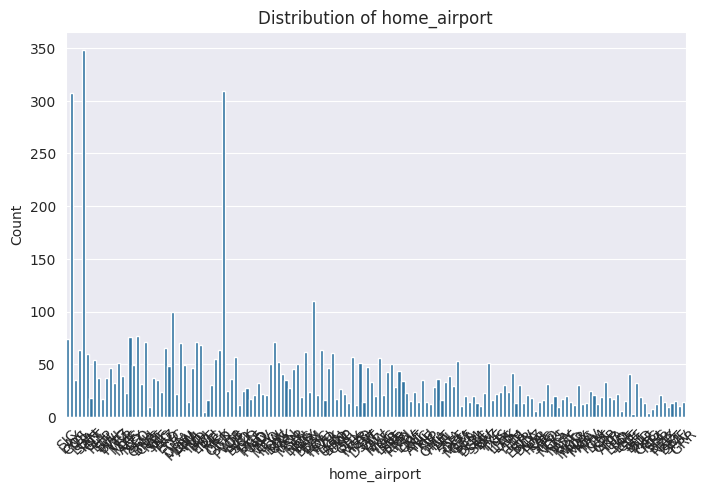

In [17]:
for col in cat_col:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [18]:
df.gender.value_counts()

gender
F    5118
M     653
O      11
Name: count, dtype: int64

### Numerical Columns

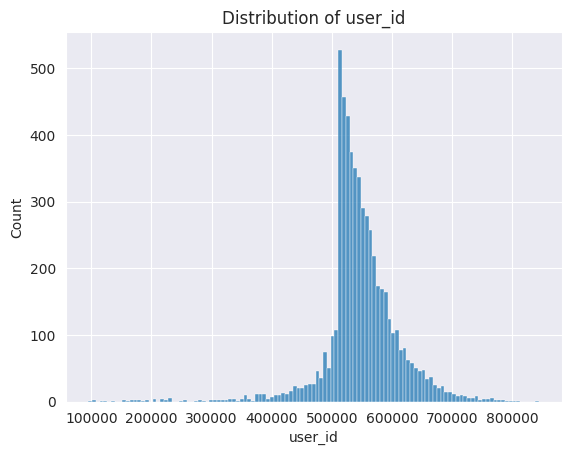

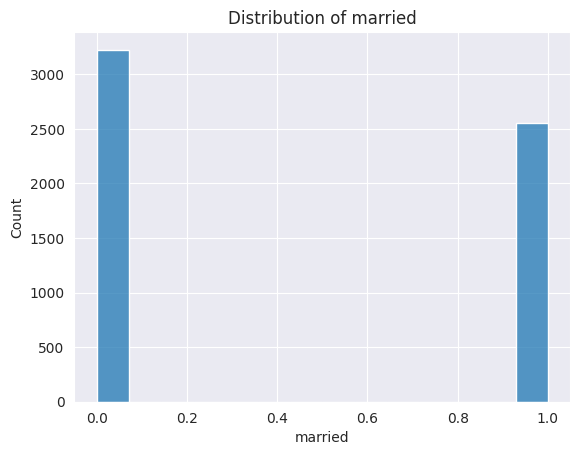

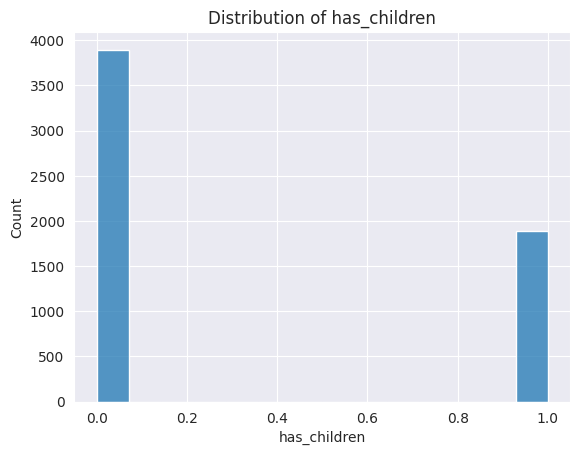

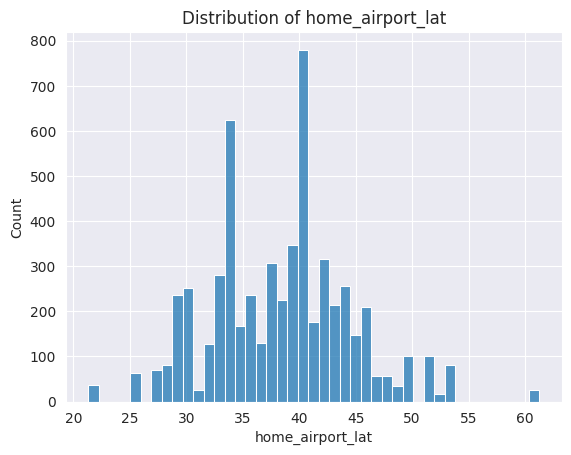

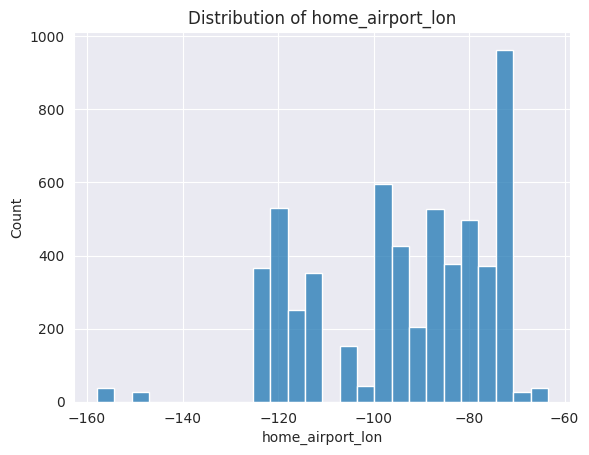

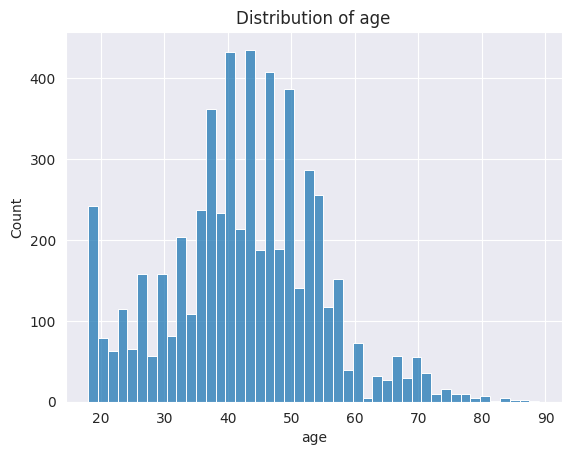

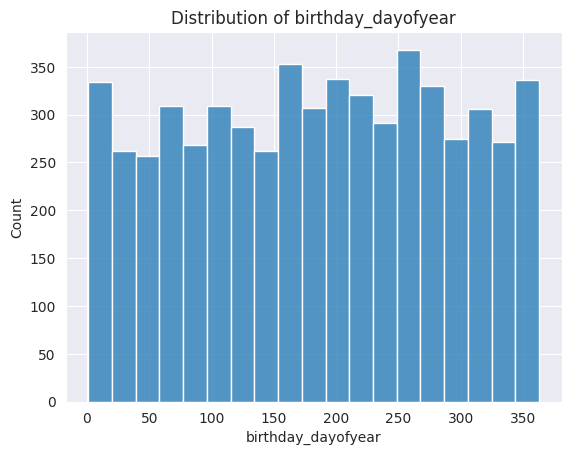

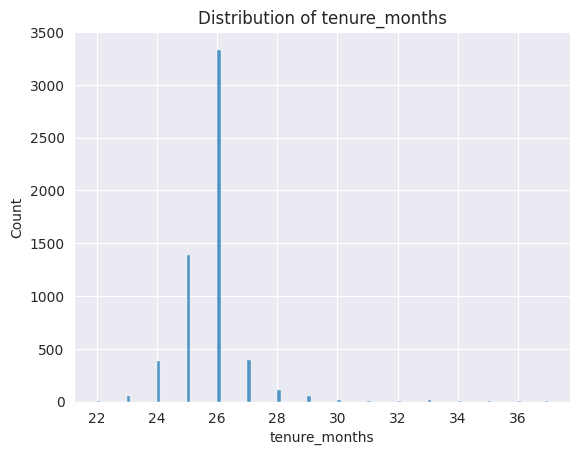

In [19]:
for col in num_col:
    sns.histplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [20]:
df['tenure_months'].value_counts()

tenure_months
26    3334
25    1392
27     394
24     382
28     106
23      56
29      52
33      15
30      15
34      10
31       9
35       4
37       4
36       3
32       3
22       3
Name: count, dtype: int64

# Hotels

In [23]:
df = pd.read_csv('../../TravelTide/data/hotels.csv')

## Data Exploration

In [24]:
df.head()

,trip_id,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_per_room_usd
0,582979-5475b9940ee240bf9328a0cc0bc9900c,NH Hotel - ottawa,6,1,2023-03-31 13:32:21.030000,2023-04-07 11:00:00.000000,110
1,588386-233db0f627cf4aaaaeaa9a632daa5ec4,Accor - philadelphia,1,1,2023-04-04 10:43:44.175000,2023-04-05 11:00:00.000000,126
2,514785-863ac3b4eb984f1eb226d67955623a5d,Choice Hotels - montreal,3,1,2023-06-21 20:06:24.300000,2023-06-25 11:00:00.000000,87
3,600395-79e934e3dcf2462587a0beffbebd6783,Marriott - memphis,1,2,2023-04-21 15:58:28.200000,2023-04-23 11:00:00.000000,153
4,474120-a87f749cf54b4f4ca9262d07080a06b2,Accor - san francisco,4,2,2023-02-02 14:18:11.205000,2023-02-07 11:00:00.000000,346


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13772 entries, 0 to 13771
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   trip_id             13772 non-null  object
 1   hotel_name          13772 non-null  object
 2   nights              13772 non-null  int64 
 3   rooms               13772 non-null  int64 
 4   check_in_time       13772 non-null  object
 5   check_out_time      13772 non-null  object
 6   hotel_per_room_usd  13772 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 753.3+ KB


In [26]:
df.describe()

,nights,rooms,hotel_per_room_usd
count,13772.000000,13772.000000,13772.000000
mean,3.616250,1.195396,178.147401
std,3.758377,0.499596,119.019998
min,-2.000000,1.000000,17.000000
25%,1.000000,1.000000,99.000000
50%,2.000000,1.000000,148.000000
75%,5.000000,1.000000,223.000000
max,43.000000,4.000000,1376.000000


In [27]:
df.duplicated().sum()

np.int64(0)

## Convert check in and check out time

In [28]:
df['check_in_time'] = pd.to_datetime(df['check_in_time'])
df['check_in_dayofyear'] = df['check_in_time'].dt.dayofyear
df['check_in_hour'] = df['check_in_time'].dt.hour

df['check_out_time'] = pd.to_datetime(df['check_out_time'])
df['check_out_dayofyear'] = df['check_out_time'].dt.dayofyear
df['check_out_hour'] = df['check_out_time'].dt.hour

In [29]:
df.head()

,trip_id,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_per_room_usd,check_in_dayofyear,check_in_hour,check_out_dayofyear,check_out_hour
0,582979-5475b9940ee240bf9328a0cc0bc9900c,NH Hotel - ottawa,6,1,2023-03-31 13:32:21.030,2023-04-07 11:00:00,110,90,13,97,11
1,588386-233db0f627cf4aaaaeaa9a632daa5ec4,Accor - philadelphia,1,1,2023-04-04 10:43:44.175,2023-04-05 11:00:00,126,94,10,95,11
2,514785-863ac3b4eb984f1eb226d67955623a5d,Choice Hotels - montreal,3,1,2023-06-21 20:06:24.300,2023-06-25 11:00:00,87,172,20,176,11
3,600395-79e934e3dcf2462587a0beffbebd6783,Marriott - memphis,1,2,2023-04-21 15:58:28.200,2023-04-23 11:00:00,153,111,15,113,11
4,474120-a87f749cf54b4f4ca9262d07080a06b2,Accor - san francisco,4,2,2023-02-02 14:18:11.205,2023-02-07 11:00:00,346,33,14,38,11


## Plots

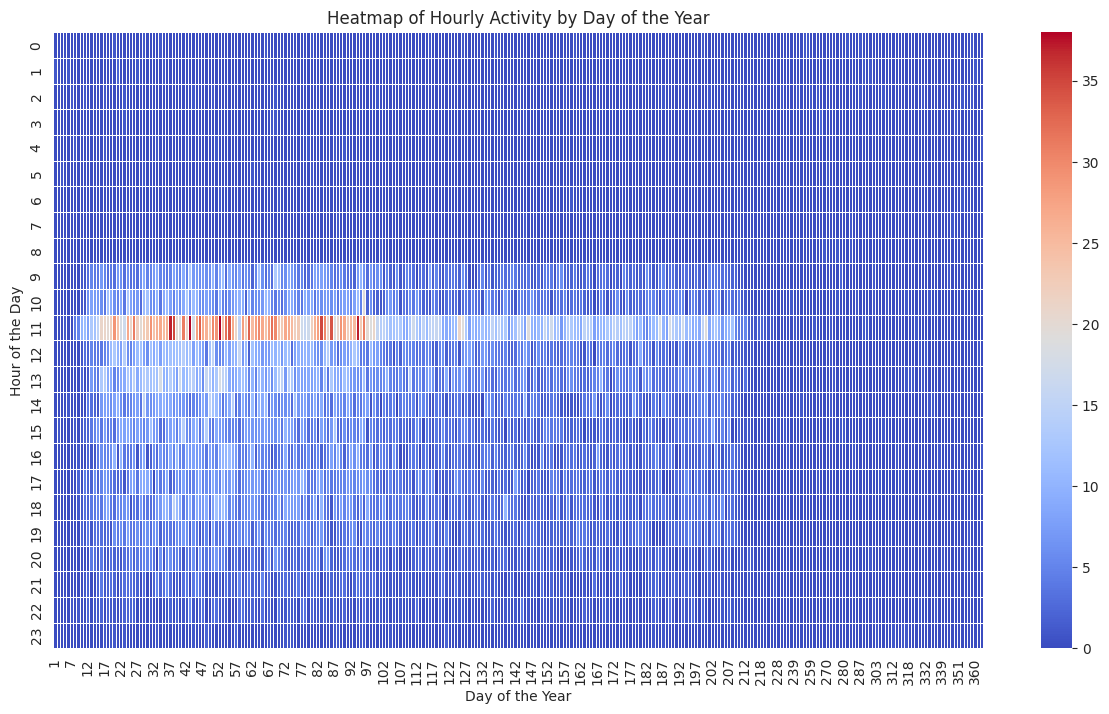

In [30]:
# Group by day of the year and hour
heatmap_data = df.groupby([ 'check_in_hour', 'check_in_dayofyear']).size().unstack(fill_value=0)

# Plot heatmap using Seaborn
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Heatmap of Hourly Activity by Day of the Year")
plt.xlabel("Day of the Year")
plt.ylabel("Hour of the Day")
plt.show()

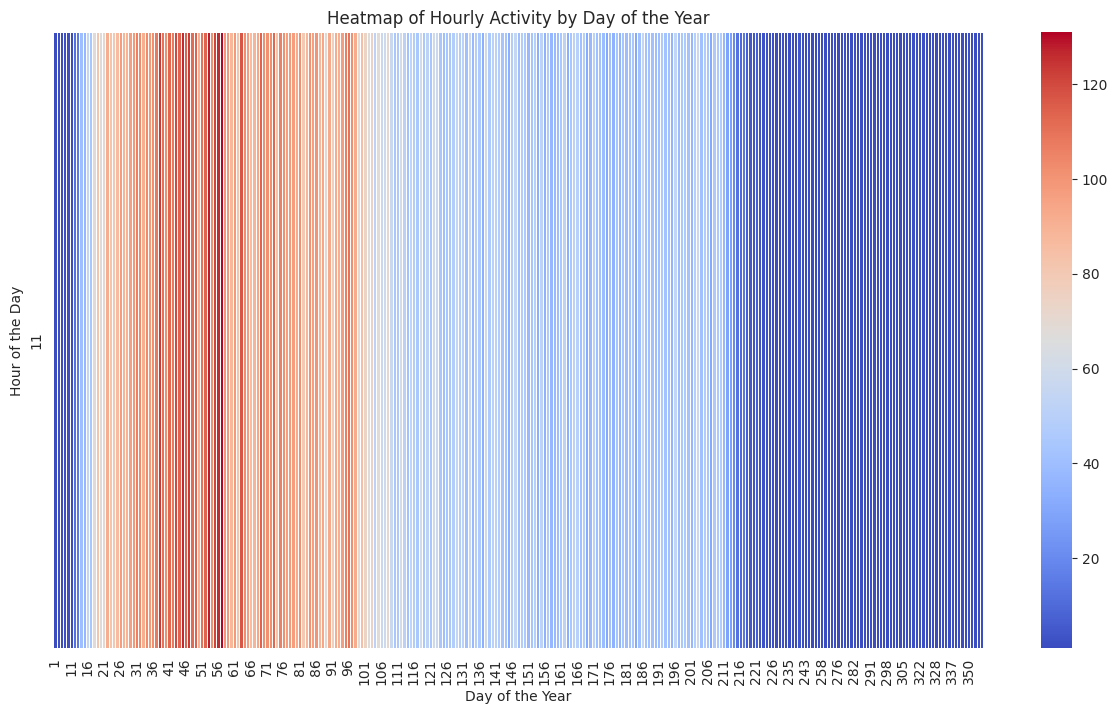

In [31]:
# Group by day of the year and hour
heatmap_data = df.groupby([ 'check_out_hour', 'check_out_dayofyear']).size().unstack(fill_value=0)

# Plot heatmap using Seaborn
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Heatmap of Hourly Activity by Day of the Year")
plt.xlabel("Day of the Year")
plt.ylabel("Hour of the Day")
plt.show()

In [32]:
df['check_out_hour'].value_counts()

check_out_hour
11    13772
Name: count, dtype: int64

In [33]:
df.columns

Index(['trip_id', 'hotel_name', 'nights', 'rooms', 'check_in_time',
       'check_out_time', 'hotel_per_room_usd', 'check_in_dayofyear',
       'check_in_hour', 'check_out_dayofyear', 'check_out_hour'],
      dtype='object')

In [34]:
num_col = ['nights', 'rooms', 'hotel_per_room_usd', 'check_in_dayofyear', 'check_in_hour', 'check_out_dayofyear', 'check_out_hour']

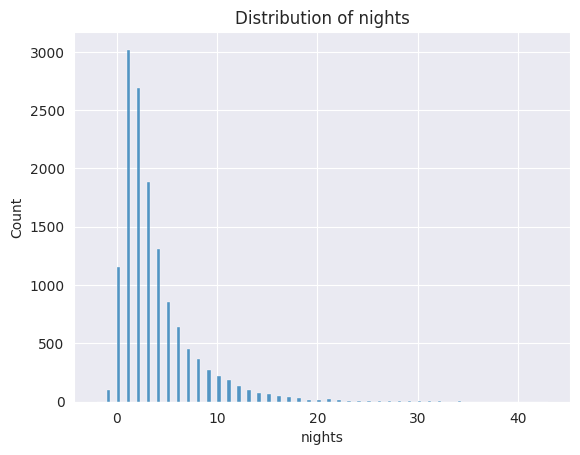

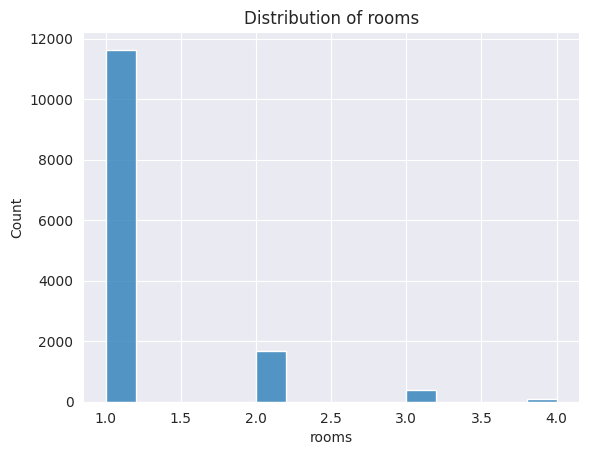

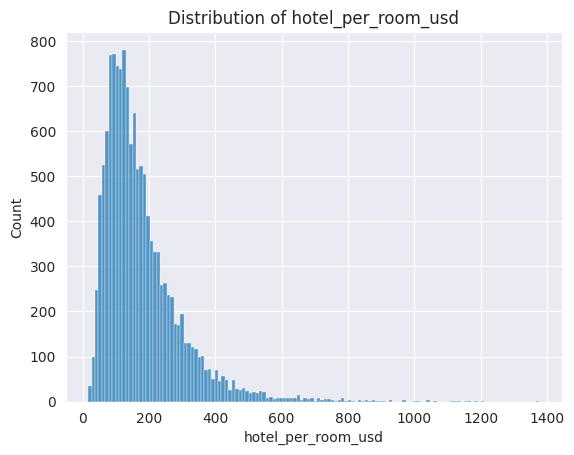

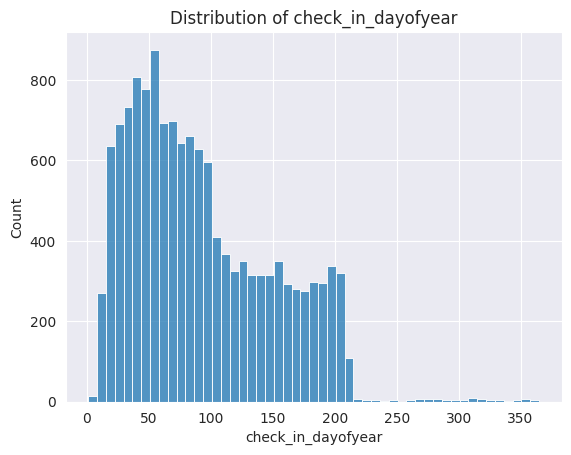

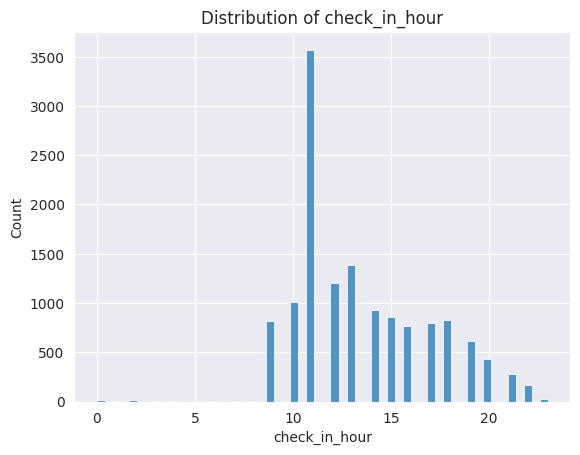

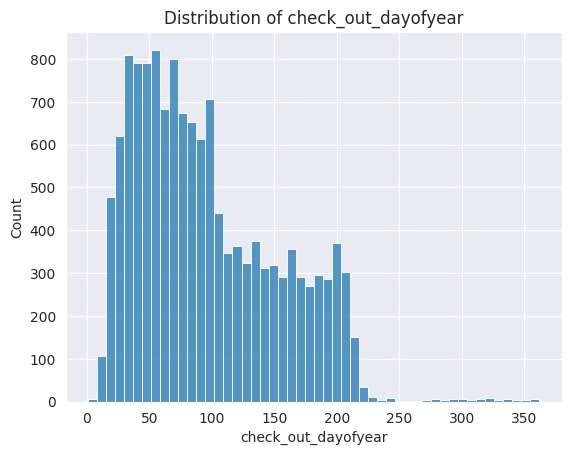

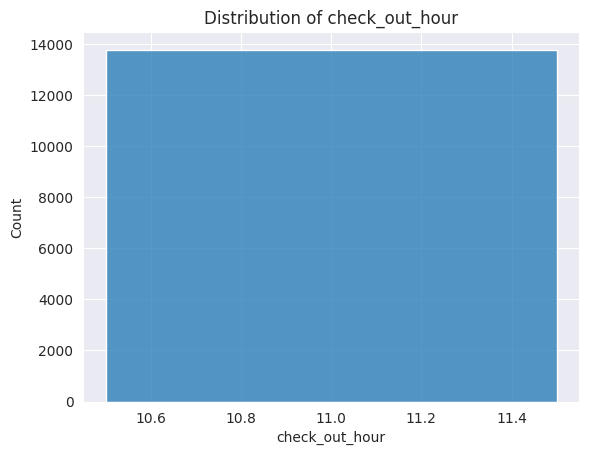

In [35]:
for col in num_col:
    sns.histplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

<Axes: xlabel='hotel_name'>

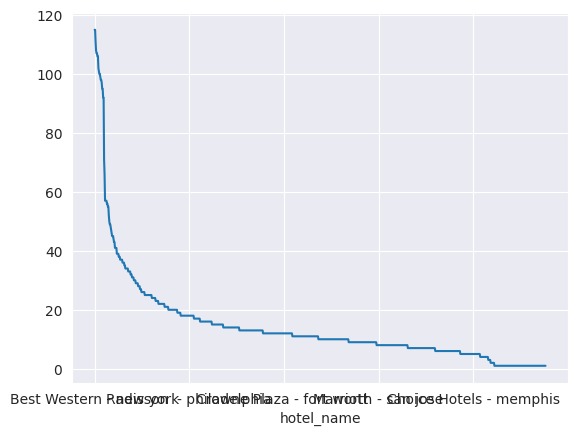

In [36]:
df['hotel_name'].value_counts().plot()

## Correcting nights

In [37]:
df

,trip_id,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_per_room_usd,check_in_dayofyear,check_in_hour,check_out_dayofyear,check_out_hour
0,582979-5475b9940ee240bf9328a0cc0bc9900c,NH Hotel - ottawa,6,1,2023-03-31 13:32:21.030,2023-04-07 11:00:00,110,90,13,97,11
1,588386-233db0f627cf4aaaaeaa9a632daa5ec4,Accor - philadelphia,1,1,2023-04-04 10:43:44.175,2023-04-05 11:00:00,126,94,10,95,11
2,514785-863ac3b4eb984f1eb226d67955623a5d,Choice Hotels - montreal,3,1,2023-06-21 20:06:24.300,2023-06-25 11:00:00,87,172,20,176,11
3,600395-79e934e3dcf2462587a0beffbebd6783,Marriott - memphis,1,2,2023-04-21 15:58:28.200,2023-04-23 11:00:00,153,111,15,113,11
4,474120-a87f749cf54b4f4ca9262d07080a06b2,Accor - san francisco,4,2,2023-02-02 14:18:11.205,2023-02-07 11:00:00,346,33,14,38,11
...,...,...,...,...,...,...,...,...,...,...,...
13767,583623-70097bf1d1334cfb891ac2bd09f448ae,Shangri-La - montreal,3,1,2023-02-23 17:25:07.185,2023-02-27 11:00:00,142,54,17,58,11
13768,512377-acf089357a6b497d91eda34bb532578d,Marriott - washington,5,1,2023-04-02 12:25:51.465,2023-04-08 11:00:00,446,92,12,98,11
13769,497042-fa163de72e234eaf9c9bc8b477fbf66a,Hyatt - san antonio,2,1,2023-04-13 11:40:58.350,2023-04-15 11:00:00,103,103,11,105,11
13770,598533-40848e5db09e46aa8f56c0c3ccdefb2d,Hyatt - macau,12,1,2024-01-24 09:54:31.635,2024-02-05 11:00:00,114,24,9,36,11


In [38]:
df_wrong_nights = df[df['nights'] < 1].copy()

In [39]:
# Tip: See the check in and checkout times
df_wrong_nights

,trip_id,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_per_room_usd,check_in_dayofyear,check_in_hour,check_out_dayofyear,check_out_hour
14,521956-3f5c4243e6ef493cbd7a116263dbded8,Conrad - charlotte,0,1,2023-01-17 16:10:51.690,2023-01-18 11:00:00,97,17,16,18,11
21,540666-7e2dbdb4bdf045299f3a154ad0e4e312,Crowne Plaza - new york,0,1,2023-04-04 14:11:22.965,2023-04-05 11:00:00,422,94,14,95,11
67,676570-ed23a4a861404b84b240ca68b9da1cb3,Radisson - tucson,0,1,2023-04-05 18:52:19.605,2023-04-06 11:00:00,193,95,18,96,11
85,516456-2a5e97d1772641dda4fb5fe66eeaa74e,Best Western - new york,0,1,2023-06-20 17:12:04.095,2023-06-21 11:00:00,228,171,17,172,11
88,592158-b880536527d049a7bbfe8da5596d4243,Marriott - portland,0,1,2023-02-20 13:40:12.810,2023-02-21 11:00:00,137,51,13,52,11
...,...,...,...,...,...,...,...,...,...,...,...
13653,526901-ddb83d0c771f483d93e412e5232d4e36,Radisson - quebec,0,1,2023-01-22 13:18:46.935,2023-01-23 11:00:00,117,22,13,23,11
13669,519725-cd3c41f793b4427e8ea87390fd4cf1b5,Extended Stay - houston,0,1,2023-02-02 12:37:17.175,2023-02-03 11:00:00,63,33,12,34,11
13687,530322-197abc1d374d42dcb3a34f10dd651652,Choice Hotels - quebec,0,1,2023-03-13 17:18:13.770,2023-03-14 11:00:00,200,72,17,73,11
13691,522533-226606028b544eb68edcc774d3055574,InterContinental - los angeles,0,1,2023-02-27 19:40:15.465,2023-02-28 11:00:00,240,58,19,59,11


maybe all nights are wrong!

In [40]:
df['new_nights'] = (df['check_out_time'].dt.floor('D') - df['check_in_time'].dt.floor('D')).dt.days

In [41]:
# Tip: check 0 nights
df['new_nights'].value_counts()

new_nights
 2     3039
 3     2466
 4     1763
 1     1701
 5     1185
 6      800
 7      574
 8      396
 0      389
 9      333
 10     234
 11     200
 12     166
 13     100
 14      92
 15      66
 16      54
 17      40
 18      37
-1       26
 20      21
 21      18
 22      14
 19       9
 23       7
 24       6
 25       5
 26       4
 27       4
 28       4
 34       3
 29       3
 30       3
 32       2
 31       2
 35       2
 40       1
 42       1
 43       1
 33       1
Name: count, dtype: int64

In [43]:
# Check 0 and -1
df[df['new_nights']==-1]

,trip_id,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_per_room_usd,check_in_dayofyear,check_in_hour,check_out_dayofyear,check_out_hour,new_nights
1454,602598-22e0198df949454b92c7ee3f00d103f5,Conrad - charlotte,-1,3,2023-05-02 10:05:37.230,2023-05-01 11:00:00,206,122,10,121,11,-1
2131,518998-bdc08a2047d545d2b2b024aac212a5f6,Extended Stay - new york,-1,1,2023-01-30 11:03:20.565,2023-01-29 11:00:00,244,30,11,29,11,-1
3405,602598-528773b7fe7940f794683d3638a386bd,Radisson - boston,-1,1,2023-02-27 09:22:14.970,2023-02-26 11:00:00,112,58,9,57,11,-1
3671,566875-ec782975633b4a48a5486870fd121934,NH Hotel - new york,-1,1,2023-05-22 09:43:37.065,2023-05-21 11:00:00,52,142,9,141,11,-1
4448,528122-d58ec81e2ab44005a973f08d89905550,Hyatt - memphis,-1,1,2023-03-11 10:38:00.600,2023-03-10 11:00:00,310,70,10,69,11,-1
4512,518324-322ae705590744379ae7f288e2f4b9a9,Extended Stay - houston,-1,1,2023-01-16 11:24:43.875,2023-01-15 11:00:00,140,16,11,15,11,-1
4524,526490-bc1872e571624ae5aac473a046c6e9bb,NH Hotel - chicago,-1,1,2023-02-05 11:15:50.400,2023-02-04 11:00:00,79,36,11,35,11,-1
4807,521335-3cce682f216b42a1a8778811b89cd5c9,Extended Stay - oklahoma city,-1,1,2023-03-11 09:59:40.290,2023-03-10 11:00:00,421,70,9,69,11,-1
4863,596320-67f28818cafd4a1c966362cf6730cd3b,Accor - philadelphia,-1,3,2023-02-21 11:08:20.175,2023-02-20 11:00:00,159,52,11,51,11,-1
5107,532063-c4ec4ea4518841909efb934203f18974,Banyan Tree - nashville,-1,1,2023-01-20 11:53:04.830,2023-01-19 11:00:00,110,20,11,19,11,-1


In [44]:
df['nights'] = df['new_nights']

In [45]:
df.drop(columns=['new_nights'], inplace=True)

In [46]:
df

,trip_id,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_per_room_usd,check_in_dayofyear,check_in_hour,check_out_dayofyear,check_out_hour
0,582979-5475b9940ee240bf9328a0cc0bc9900c,NH Hotel - ottawa,7,1,2023-03-31 13:32:21.030,2023-04-07 11:00:00,110,90,13,97,11
1,588386-233db0f627cf4aaaaeaa9a632daa5ec4,Accor - philadelphia,1,1,2023-04-04 10:43:44.175,2023-04-05 11:00:00,126,94,10,95,11
2,514785-863ac3b4eb984f1eb226d67955623a5d,Choice Hotels - montreal,4,1,2023-06-21 20:06:24.300,2023-06-25 11:00:00,87,172,20,176,11
3,600395-79e934e3dcf2462587a0beffbebd6783,Marriott - memphis,2,2,2023-04-21 15:58:28.200,2023-04-23 11:00:00,153,111,15,113,11
4,474120-a87f749cf54b4f4ca9262d07080a06b2,Accor - san francisco,5,2,2023-02-02 14:18:11.205,2023-02-07 11:00:00,346,33,14,38,11
...,...,...,...,...,...,...,...,...,...,...,...
13767,583623-70097bf1d1334cfb891ac2bd09f448ae,Shangri-La - montreal,4,1,2023-02-23 17:25:07.185,2023-02-27 11:00:00,142,54,17,58,11
13768,512377-acf089357a6b497d91eda34bb532578d,Marriott - washington,6,1,2023-04-02 12:25:51.465,2023-04-08 11:00:00,446,92,12,98,11
13769,497042-fa163de72e234eaf9c9bc8b477fbf66a,Hyatt - san antonio,2,1,2023-04-13 11:40:58.350,2023-04-15 11:00:00,103,103,11,105,11
13770,598533-40848e5db09e46aa8f56c0c3ccdefb2d,Hyatt - macau,12,1,2024-01-24 09:54:31.635,2024-02-05 11:00:00,114,24,9,36,11


lambda function

In [47]:
df['nights'] = df['nights'].apply(lambda x: abs(x) if x<0 else x)

In [48]:
df.to_csv('data/hotels_new.csv', index=False)

<Axes: xlabel='nights'>

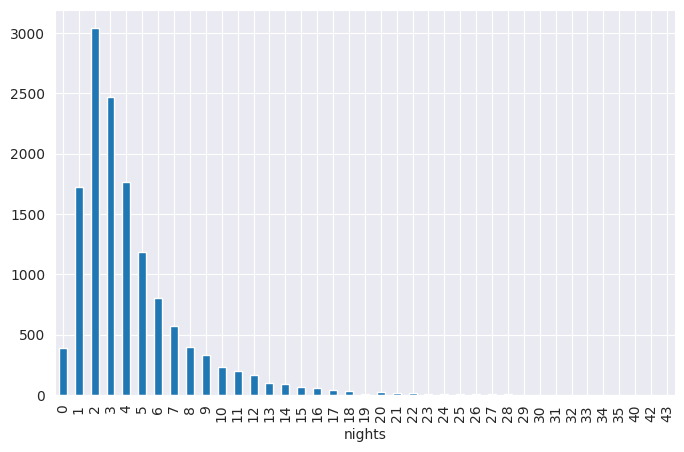

In [49]:
df['nights'].value_counts().sort_index(ascending=True).plot(kind='bar', figsize=(8, 5))

# Flights

In [56]:
df = pd.read_csv('data/flights.csv')

In [57]:
df.head()

,trip_id,origin_airport,destination,destination_airport,seats,return_flight_booked,departure_time,return_time,checked_bags,trip_airline,destination_airport_lat,destination_airport_lon,base_fare_usd
0,582979-5475b9940ee240bf9328a0cc0bc9900c,RNO,ottawa,YOW,1,True,2023-03-31 07:00:00.000000,2023-04-07 07:00:00.000000,1,Air Canada,45.323,-75.669,657.64
1,514785-863ac3b4eb984f1eb226d67955623a5d,FTW,montreal,YHU,1,False,2023-06-21 15:00:00.000000,NaN,0,Delta Air Lines,45.517,-73.417,221.83
2,588386-233db0f627cf4aaaaeaa9a632daa5ec4,CLE,philadelphia,PHL,1,True,2023-04-04 08:00:00.000000,2023-04-06 08:00:00.000000,2,American Airlines,39.872,-75.241,106.00
3,600395-79e934e3dcf2462587a0beffbebd6783,HOU,memphis,MEM,2,True,2023-04-21 13:00:00.000000,2023-04-24 13:00:00.000000,0,Delta Air Lines,35.042,-89.977,320.19
4,474120-a87f749cf54b4f4ca9262d07080a06b2,YQB,san francisco,SFO,2,True,2023-02-02 07:00:00.000000,2023-02-07 07:00:00.000000,0,Alaska Airlines,37.619,-122.375,1507.83


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13193 entries, 0 to 13192
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_id                  13193 non-null  object 
 1   origin_airport           13193 non-null  object 
 2   destination              13193 non-null  object 
 3   destination_airport      13193 non-null  object 
 4   seats                    13193 non-null  int64  
 5   return_flight_booked     13193 non-null  bool   
 6   departure_time           13193 non-null  object 
 7   return_time              12620 non-null  object 
 8   checked_bags             13193 non-null  int64  
 9   trip_airline             13193 non-null  object 
 10  destination_airport_lat  13193 non-null  float64
 11  destination_airport_lon  13193 non-null  float64
 12  base_fare_usd            13193 non-null  float64
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 1.2+ MB


In [59]:
df.describe()

,seats,checked_bags,destination_airport_lat,destination_airport_lon,base_fare_usd
count,13193.000000,13193.000000,13193.000000,13193.000000,13193.000000
mean,1.200106,0.584477,38.708329,-90.471100,489.114071
std,0.552416,0.653633,6.642478,29.068945,675.795966
min,1.000000,0.000000,-37.008000,-157.927000,2.410000
25%,1.000000,0.000000,33.942000,-112.383000,198.600000
50%,1.000000,1.000000,39.872000,-87.752000,377.820000
75%,1.000000,1.000000,42.409000,-75.669000,590.590000
max,8.000000,8.000000,55.972000,174.792000,14466.330000


In [60]:
df.duplicated().sum()

np.int64(0)

## Quick plots

In [61]:
df['origin_airport'].value_counts()

origin_airport
LGA    835
JFK    776
LAX    698
DAL    265
YYC    233
      ... 
SKA     12
POB     11
GEG      9
EDF      8
SFF      3
Name: count, Length: 159, dtype: int64

In [62]:
df['destination_airport'].value_counts()

destination_airport
JFK    944
LGA    924
LSQ    514
LAX    469
DAL    350
      ... 
THF      1
LTN      1
AUH      1
TSA      1
HAN      1
Name: count, Length: 181, dtype: int64

In [63]:
df['seats'].value_counts()

seats
1    11255
2     1426
3      367
4      116
5       16
6       11
7        1
8        1
Name: count, dtype: int64

In [64]:
df['return_flight_booked'].value_counts()

return_flight_booked
True     12620
False      573
Name: count, dtype: int64

<Axes: xlabel='base_fare_usd', ylabel='Density'>

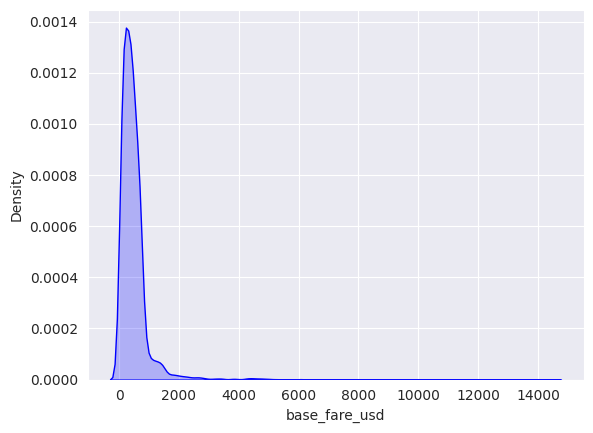

In [65]:
sns.kdeplot(df['base_fare_usd'], fill=True, color='blue')

In [66]:
df[df['base_fare_usd']>3000]

,trip_id,origin_airport,destination,destination_airport,seats,return_flight_booked,departure_time,return_time,checked_bags,trip_airline,destination_airport_lat,destination_airport_lon,base_fare_usd
295,565827-22aa93ceeea24a01a41e5e1a50ceff9b,BNA,dubai,DXB,2,True,2023-12-23 08:00:00.000000,2024-01-02 08:00:00.000000,1,Emirates,25.255,55.364,4572.97
296,549058-8b09b587ecee48d19e2cc451a97238b8,YKZ,guangzhou,CAN,2,True,2024-07-16 07:00:00.000000,2024-07-29 07:00:00.000000,1,China Southern Airlines,23.184,113.266,4194.38
596,591063-b13a35b8501d4e2b913736e2ee1ed93c,YTZ,kuala lumpur,KUL,2,True,2023-12-08 07:00:00.000000,2023-12-19 07:00:00.000000,1,American Airlines,2.746,101.710,5769.63
720,646933-59c510529f6f4e3585bdb9b2e76c68e7,JFK,san francisco,SFO,4,True,2023-07-22 12:00:00.000000,2023-07-25 12:00:00.000000,1,United Airlines,37.619,-122.375,3099.71
745,373489-6dffc799005146528b75488c2529afbe,ICT,osaka,ITM,4,True,2024-02-09 09:00:00.000000,2024-02-22 09:00:00.000000,3,Japan Airlines,34.785,135.438,7451.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12833,535595-6640f8ff7ef0443691022cc60d6ef860,ATL,delhi,DEL,5,True,2023-10-30 10:00:00.000000,2023-11-14 10:00:00.000000,4,Lufthansa,28.566,77.103,11356.96
12969,528743-c62add2a7d164c03ad97fbc78850e2fa,RIV,delhi,DEL,3,True,2023-09-19 17:00:00.000000,2023-10-10 17:00:00.000000,2,Malaysia Airlines,28.566,77.103,6966.58
13037,584115-756d51f6f8a148b389c0836c3b71fac5,IAH,taipei,TPE,2,True,2024-03-14 19:00:00.000000,2024-03-28 19:00:00.000000,1,China Southern Airlines,25.069,121.552,4721.63
13154,560739-b91cdfb66dee4b618b2c383cebcc4300,LCK,tokyo,HND,2,True,2024-01-17 15:00:00.000000,2024-01-31 15:00:00.000000,1,All Nippon Airways,35.765,140.386,3825.76


# Sessions

In [67]:
df = pd.read_csv('../../TravelTide/data/sessions.csv')

In [68]:
df.head()

,session_id,user_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,hotel_booked,page_clicks,cancellation
0,536782-40ea451ff53841b296036272519d4e7e,536782,NaN,2023-01-18 19:33:00.000000,2023-01-18 19:34:20.000000,False,False,NaN,NaN,False,False,11,False
1,570600-1913f4dc10e445e59765e73588e68dfd,570600,NaN,2023-04-28 21:24:00.000000,2023-04-28 21:24:16.000000,False,False,NaN,NaN,False,False,2,False
2,511055-89aed43aef924e97a0b4cadff654328f,511055,511055-57ed6923358d47a0a3be86eaf8128ece,2023-02-02 20:49:00.000000,2023-02-02 20:52:39.000000,True,False,0.1,NaN,True,True,30,False
3,677209-77c593f41bd04228b89a55b3a9d34141,677209,NaN,2023-06-01 21:20:00.000000,2023-06-01 21:20:24.000000,False,False,NaN,NaN,False,False,3,False
4,546867-c1b3888def70494a893b025bfa3a1b80,546867,NaN,2023-03-04 20:38:00.000000,2023-03-04 20:39:08.000000,False,False,NaN,NaN,False,False,9,False


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47436 entries, 0 to 47435
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   session_id              47436 non-null  object 
 1   user_id                 47436 non-null  int64  
 2   trip_id                 16066 non-null  object 
 3   session_start           47436 non-null  object 
 4   session_end             47436 non-null  object 
 5   flight_discount         47436 non-null  bool   
 6   hotel_discount          47436 non-null  bool   
 7   flight_discount_amount  7971 non-null   float64
 8   hotel_discount_amount   6015 non-null   float64
 9   flight_booked           47436 non-null  bool   
 10  hotel_booked            47436 non-null  bool   
 11  page_clicks             47436 non-null  int64  
 12  cancellation            47436 non-null  bool   
dtypes: bool(5), float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [70]:
df.describe()

,user_id,flight_discount_amount,hotel_discount_amount,page_clicks
count,47436.000000,7971.000000,6015.000000,47436.000000
mean,547497.276246,0.139725,0.112211,17.598153
std,63772.497096,0.083942,0.062231,21.533788
min,94883.000000,0.050000,0.050000,1.000000
25%,519383.000000,0.100000,0.050000,6.000000
50%,542095.000000,0.100000,0.100000,13.000000
75%,575823.000000,0.200000,0.150000,22.000000
max,844489.000000,0.600000,0.450000,566.000000


In [71]:
df.duplicated().sum()

np.int64(0)

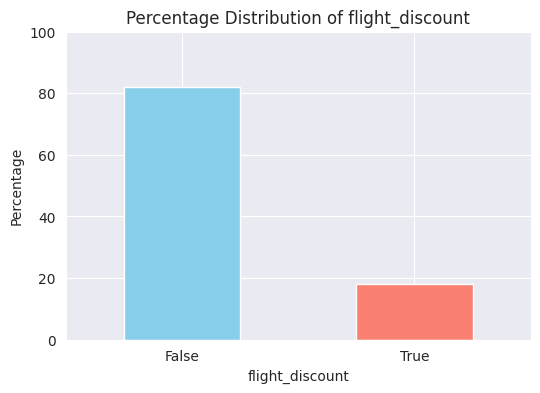

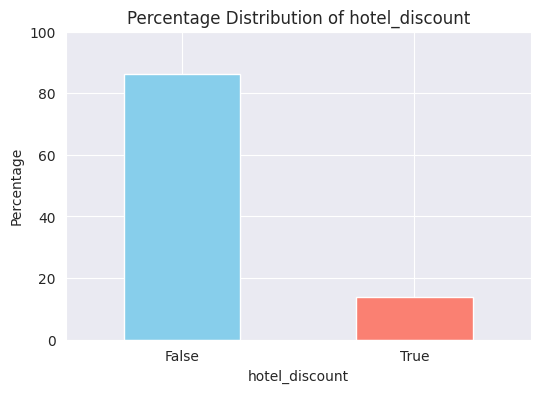

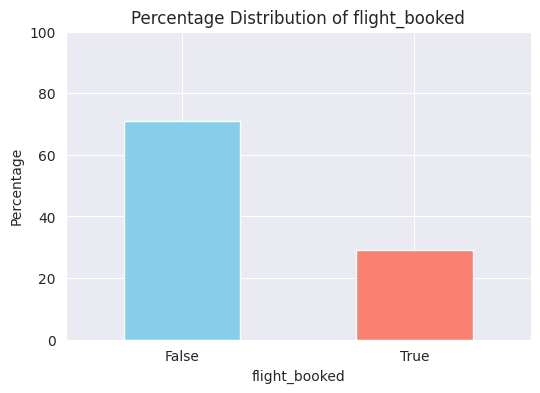

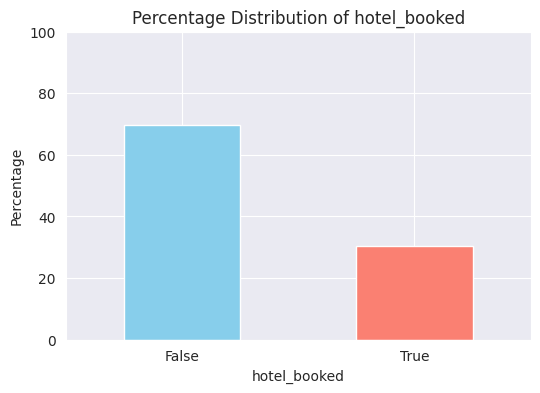

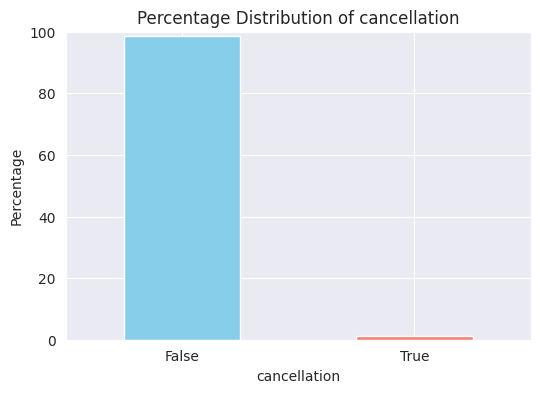

In [73]:
for column in df.select_dtypes(include=['bool']).columns:
    # Calculate percentages
    percentages = df[column].value_counts(normalize=True) * 100  # Normalize gives proportions, multiply by 100 for percentage

    # Create a bar plot
    plt.figure(figsize=(6, 4))
    percentages.plot(kind='bar', color=['skyblue', 'salmon'])

    # Customize the plot
    plt.title(f'Percentage Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.ylim(0, 100)  # Ensure the y-axis goes from 0 to 100
    plt.xticks(rotation=0)  # Keep x-ticks horizontal
    plt.show()